# Chapter 9 

Q1) 

a) Sketch the hyperplane 1+3X1−X2=0. Indicate the set of points for which 1+3X1−X2>0, 
as well as the set of points for which 1+3X1−X2<0.

b) On the same plot, sketch the hyperplane −2+X1+2X2=0. Indicate the set of points for 
which −2+X1+2X2>0, as well as the set of points for which −2+X1+2X2<0.


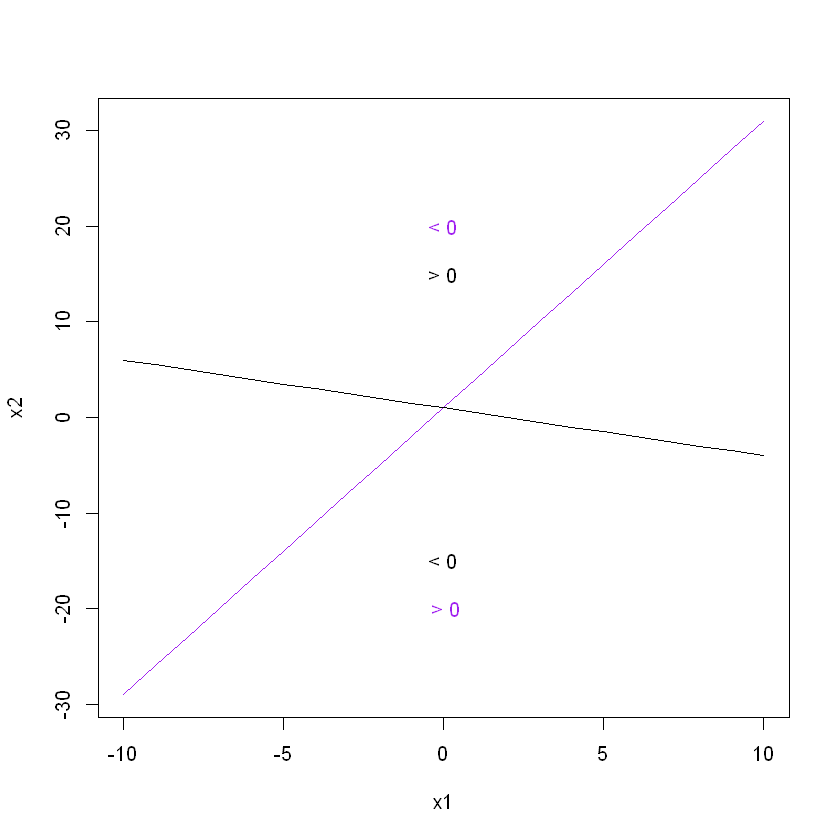

In [3]:
x1 <- -10:10
x2 <- 1 + 3 * x1

plot(x1, x2, type = "l", col = "purple")
text(c(0), c(-20), " > 0", col = "purple")
text(c(0), c(20), "< 0", col = "purple")

lines(x1, 1 - x1/2, col = "black")
text(c(0), c(-15), "< 0", col = "black")
text(c(0), c(15), "> 0", col = "black")

Q2) We have seen that in p=2 dimensions, a linear boundary takes the form β0+β1X1+β2X2=0. We now investigate a non-linear decision boundary.

a) 

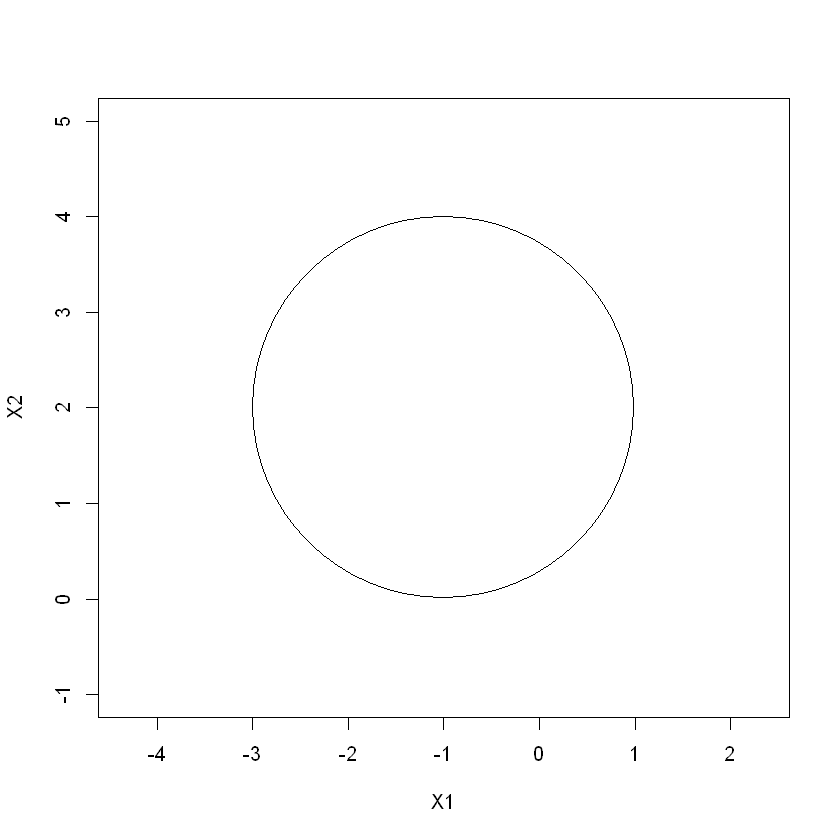

In [4]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

b)

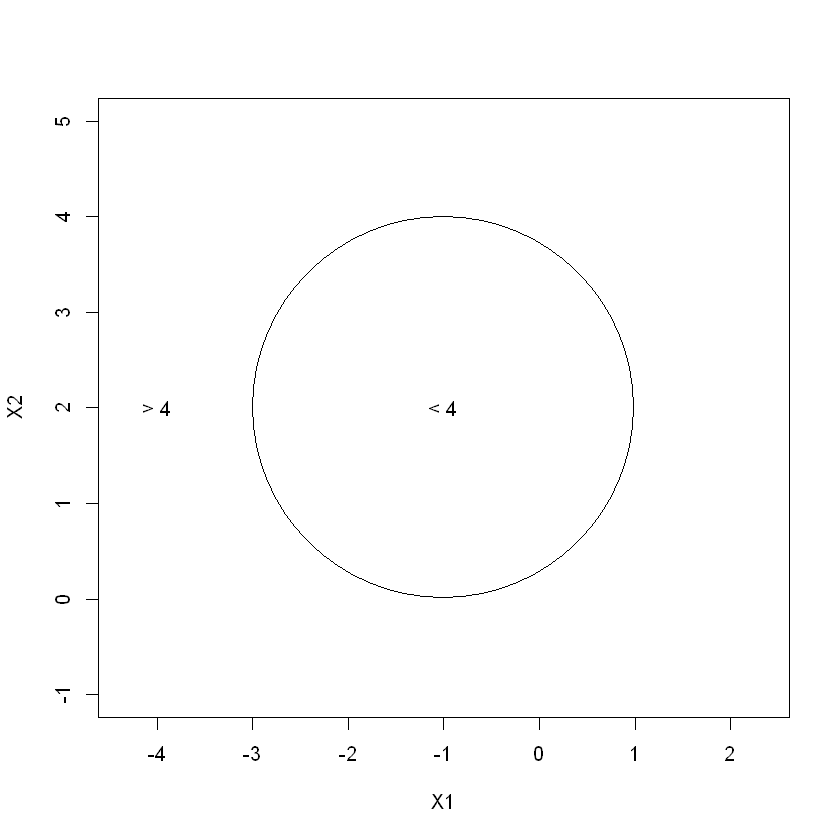

In [5]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

c)

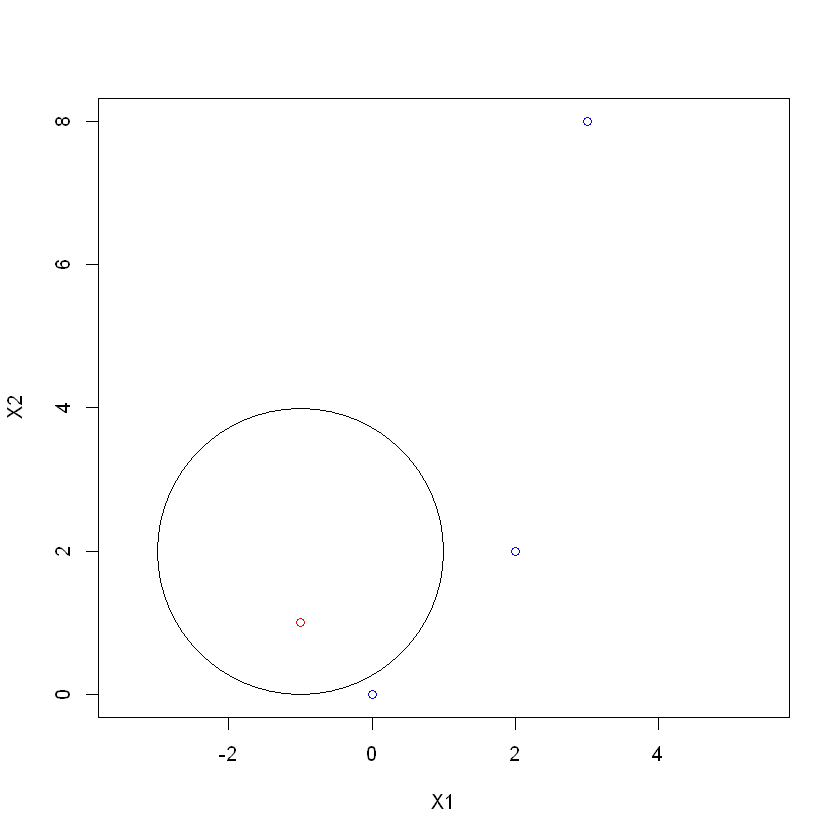

In [6]:
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

For (0,0), we have 5>4 (blue class) 
for (−1,1), we have 1<4 (red class) 
for (2,2), we have 9>4 (blue class)
for (3,8), we have 52>4 (blue class)

d) 

If we re write the initial equation it becomes X21+X22+2X1−4X2+1=0  which becomes linear in terms of X1, X21.

Q4) Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on test data ? Make plots and report training and test error rates in order to back up your assertions.

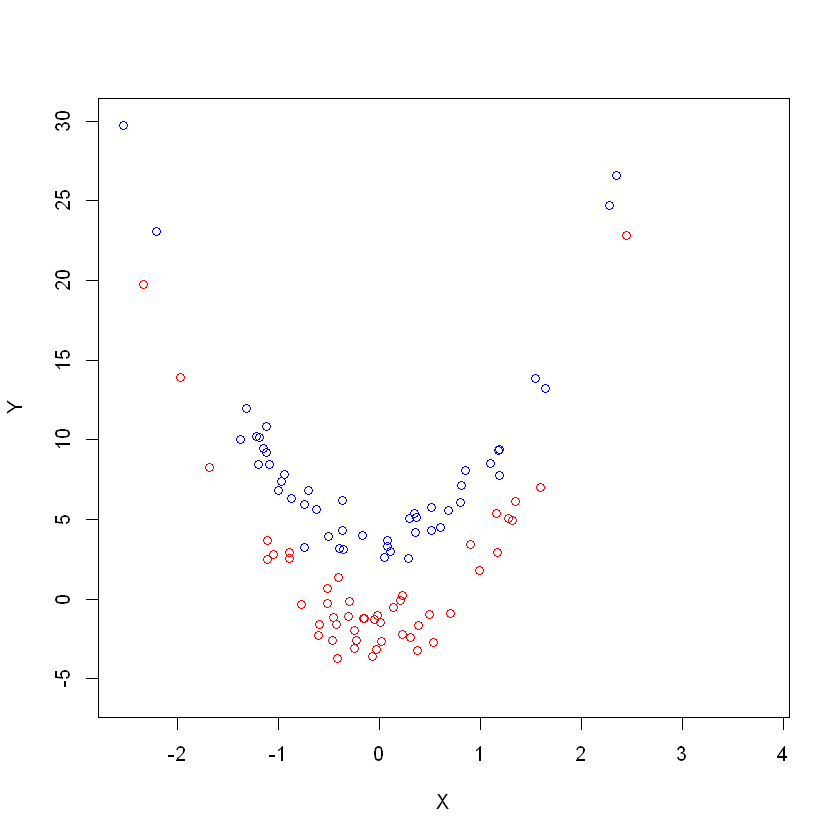

In [10]:
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)

class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "blue", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-class], y[-class], col = "red")


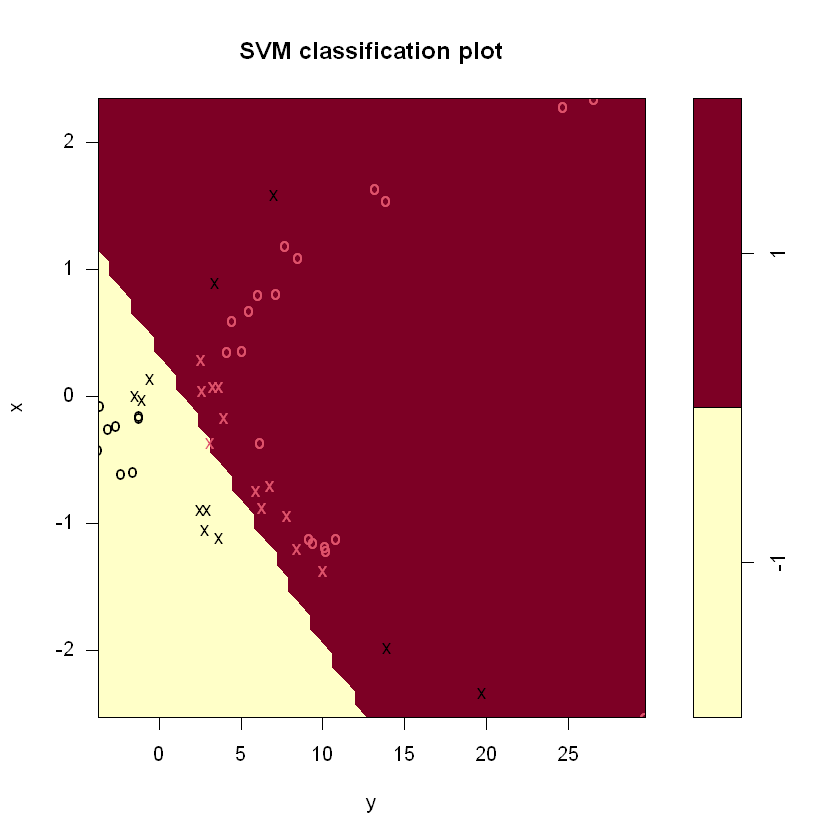

In [14]:
#Fitting an SVM on the data 
z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [20]:
table(predicted = predict(svm.linear, data.train), actual = data.train$z)

         actual
predicted -1  1
       -1 15  0
       1   4 31

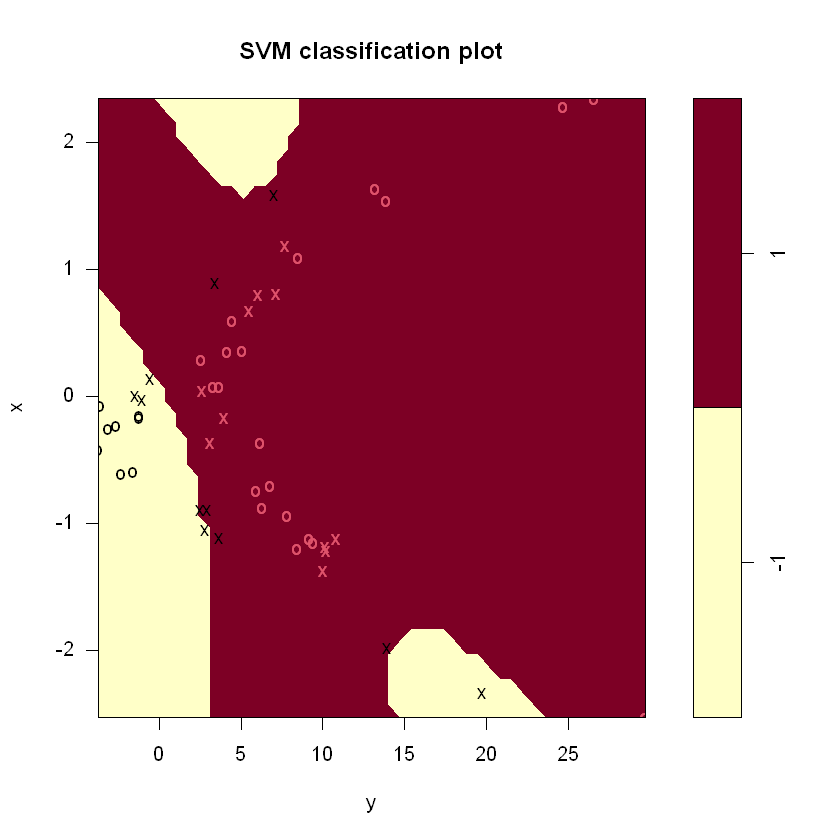

In [16]:
#Repeating the same with polynomial kerel
svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

In [21]:
table(predicted = predict(svm.poly, data.train), actual = data.train$z)

         actual
predicted -1  1
       -1 12  0
       1   7 31

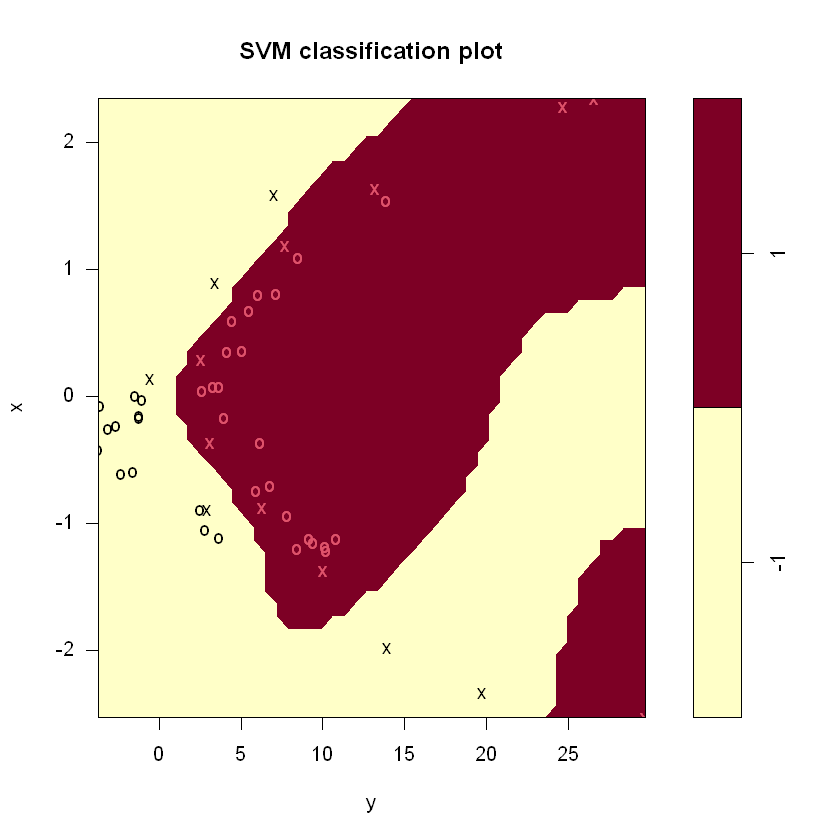

In [22]:
#Repeating the same with polynomial kerel & gamma 
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

In [23]:
table(predicted = predict(svm.radial, data.train), actual = data.train$z)

         actual
predicted -1  1
       -1 19  0
       1   0 31

Plotting the Test Data to see how svm has been applied

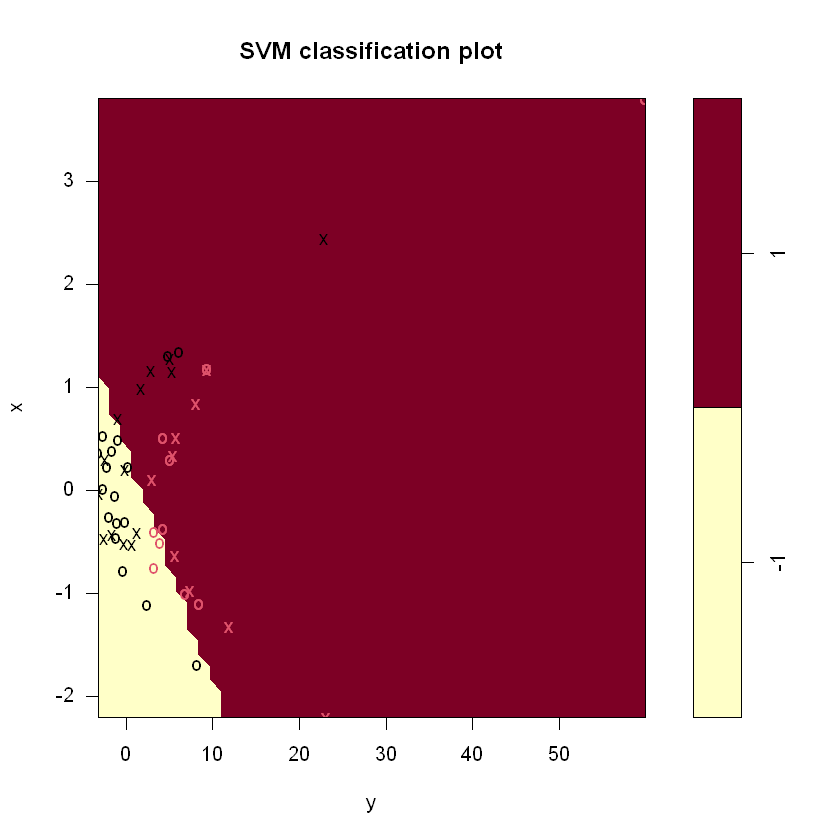

In [26]:
plot(svm.linear, data.test)

In [27]:
table(predicted = predict(svm.linear, data.test), actual = data.test$z)

         actual
predicted -1  1
       -1 21  1
       1  10 18

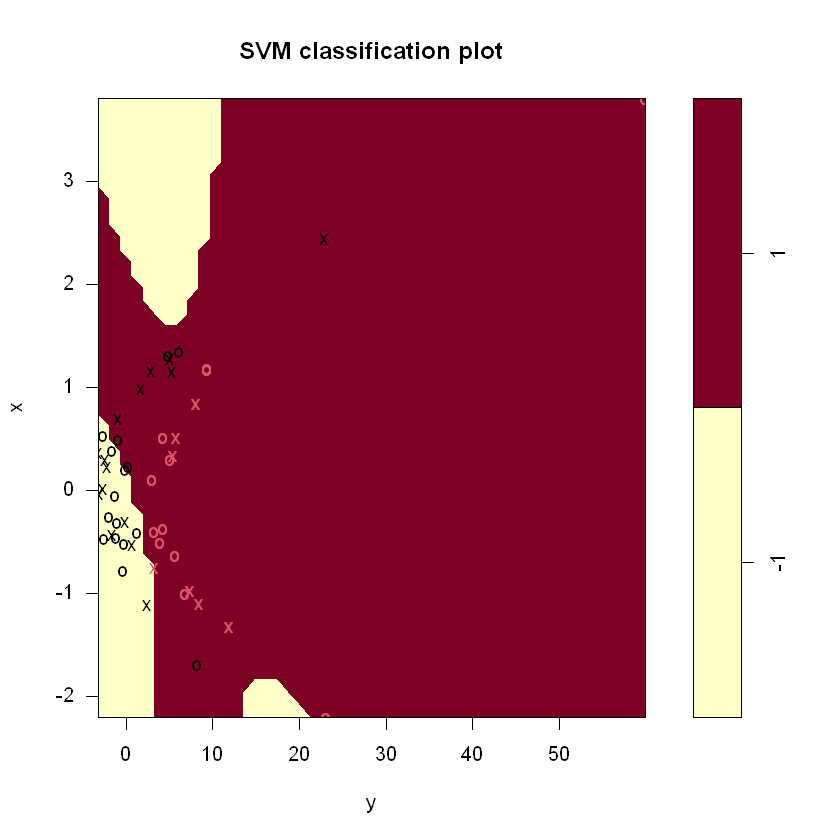

In [28]:
plot(svm.poly, data.test)

In [29]:
table(predicted = predict(svm.poly, data.test), actual = data.test$z)

         actual
predicted -1  1
       -1 18  0
       1  13 19

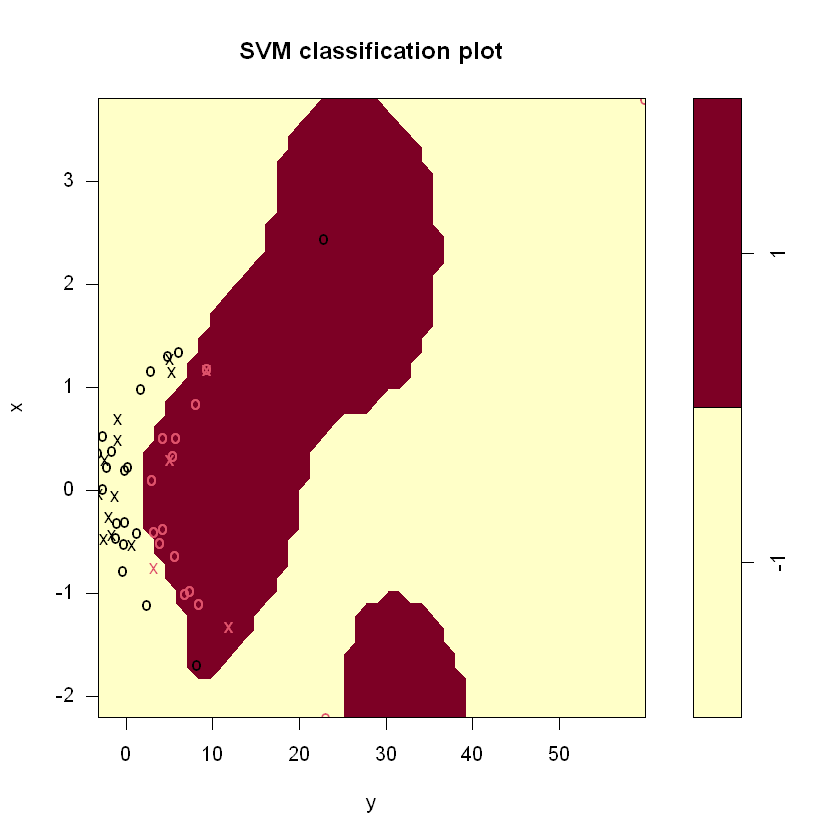

In [30]:
plot(svm.radial, data.test)

In [31]:
table(predicted = predict(svm.radial, data.test), actual = data.test$z)

         actual
predicted -1  1
       -1 29  3
       1   2 16

we can see that the radial kernel is the best model in this setting.

Q7) In this problem, you will use support vector approaches in order to predict whether a given car gets high or 
low gas mileage based on the “Auto” data set.

In [32]:
#a) 

library(ISLR)
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

In [34]:
#b) 

set.seed(123)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07634615 0.03928191
2 1e-01 0.04333333 0.03191738
3 1e+00 0.01025641 0.01792836
4 5e+00 0.01538462 0.01792836
5 1e+01 0.01788462 0.01727588
6 1e+02 0.03320513 0.02720447
7 1e+03 0.03320513 0.02720447


In [35]:
#c) 

set.seed(123)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial",
                 ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3034615 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5817308 0.04740051
2  1e-01      2 0.5817308 0.04740051
3  1e+00      2 0.5817308 0.04740051
4  5e+00      2 0.5817308 0.04740051
5  1e+01      2 0.5714744 0.04575370
6  1e+02      2 0.3034615 0.10917787
7  1e-02      3 0.5817308 0.04740051
8  1e-01      3 0.5817308 0.04740051
9  1e+00      3 0.5817308 0.04740051
10 5e+00      3 0.5817308 0.04740051
11 1e+01      3 0.5817308 0.04740051
12 1e+02      3 0.3521154 0.13782036
13 1e-02      4 0.5817308 0.04740051
14 1e-01      4 0.5817308 0.04740051
15 1e+00      4 0.5817308 0.04740051
16 5e+00      4 0.5817308 0.04740051
17 1e+01      4 0.5817308 0.04740051
18 1e+02      4 0.5817308 0.04740051


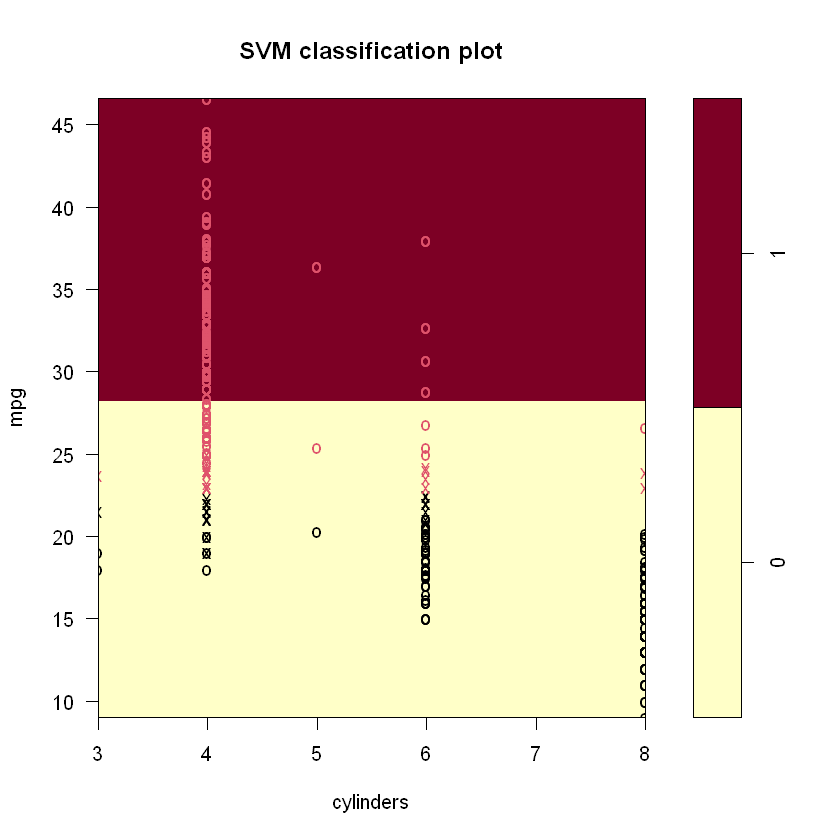

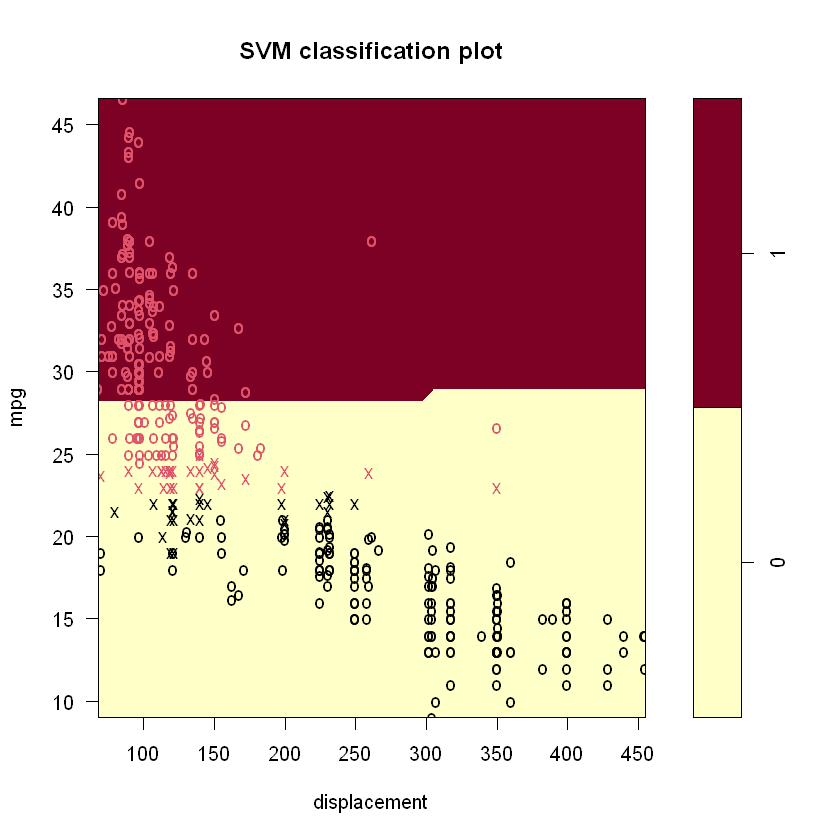

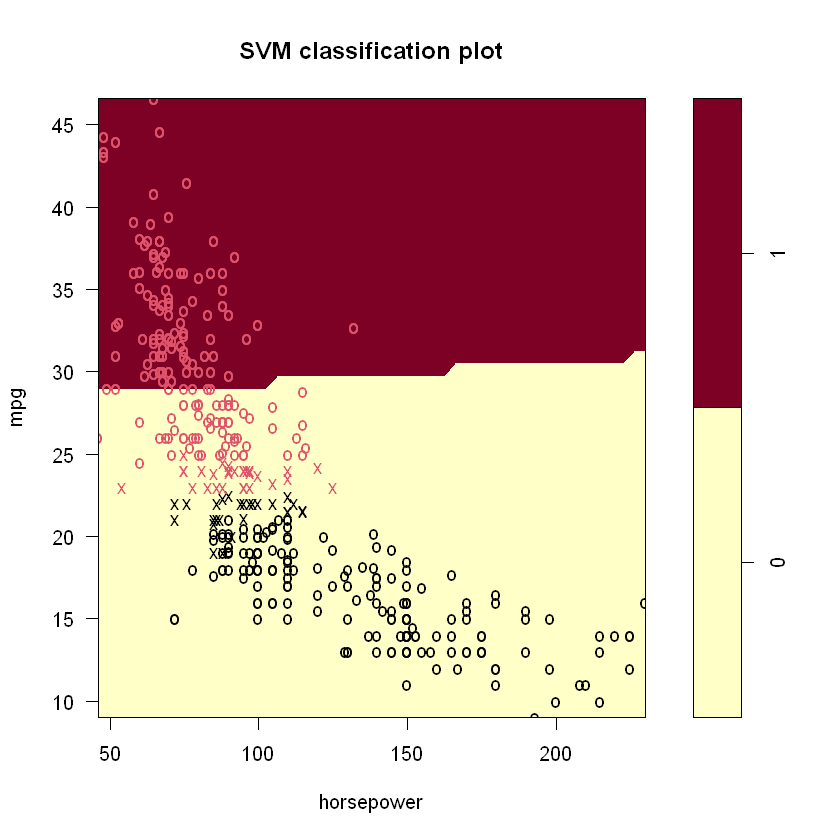

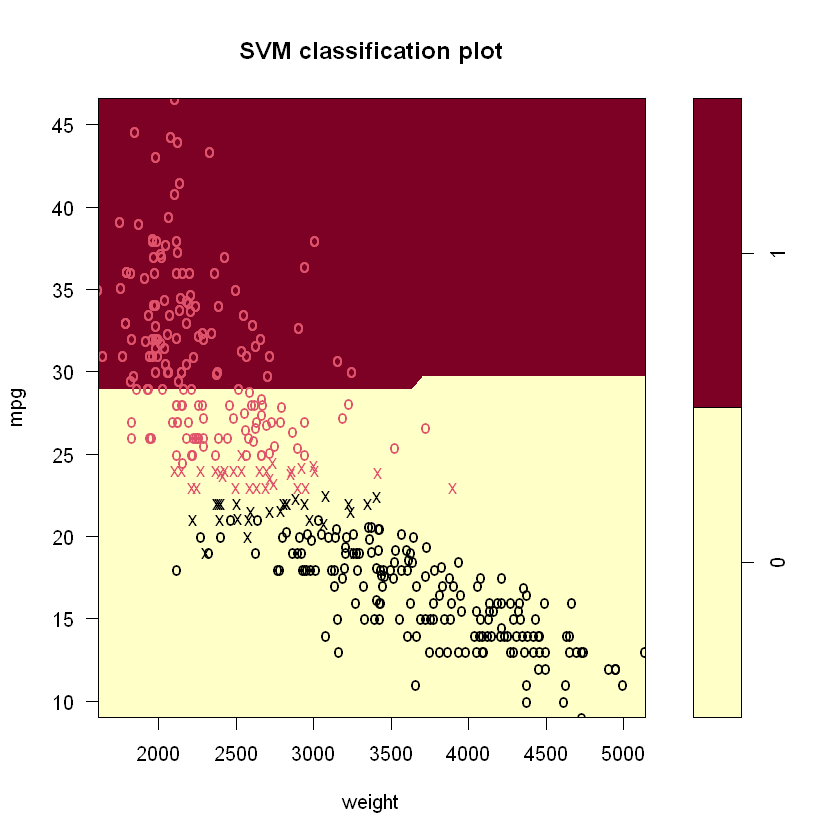

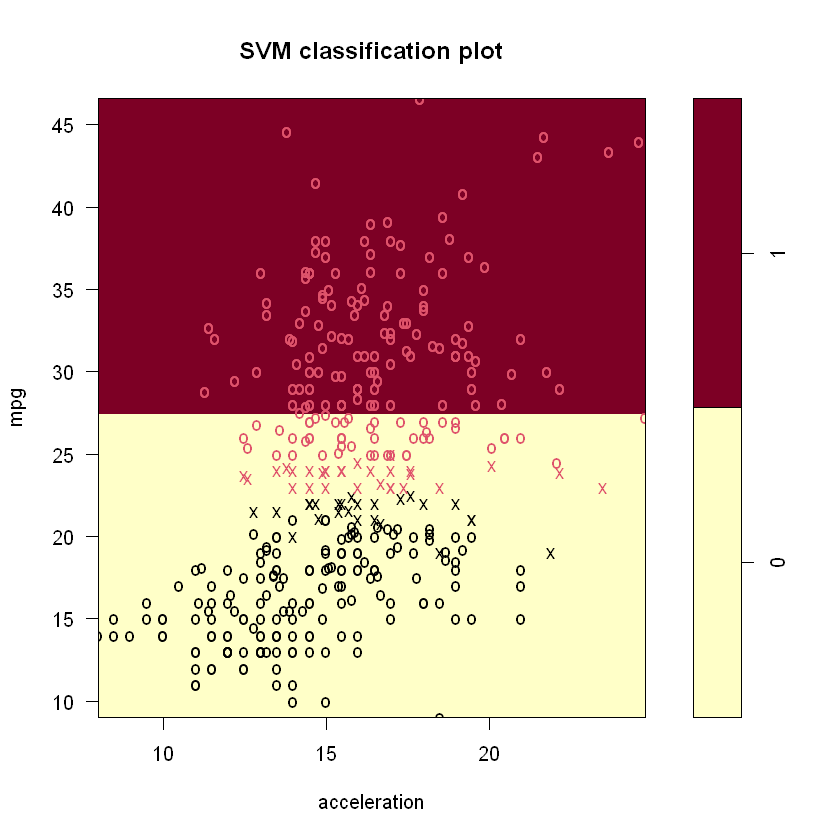

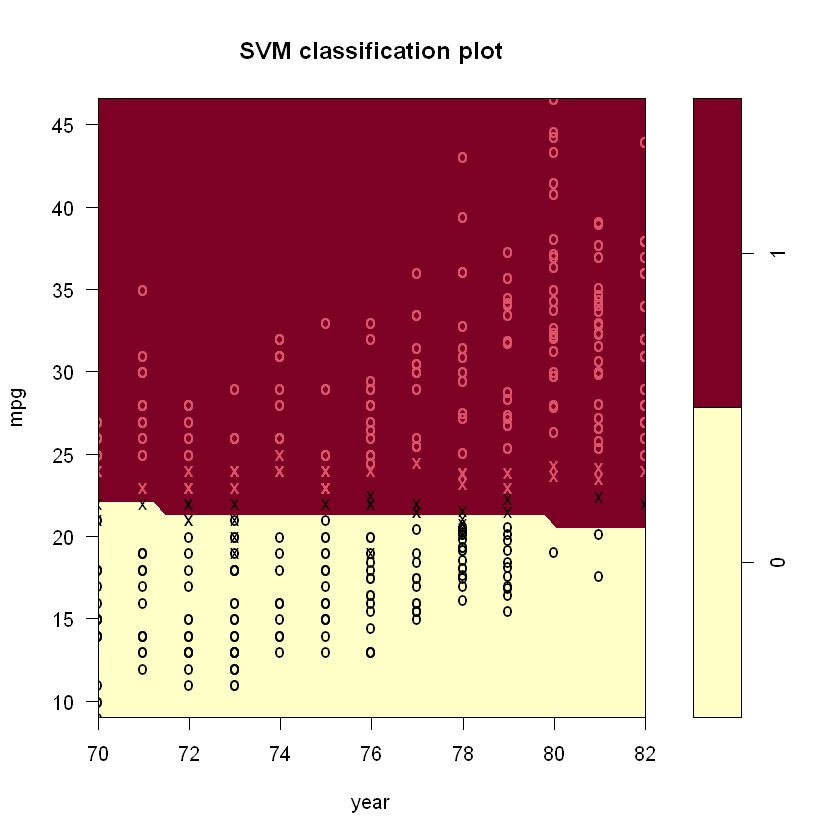

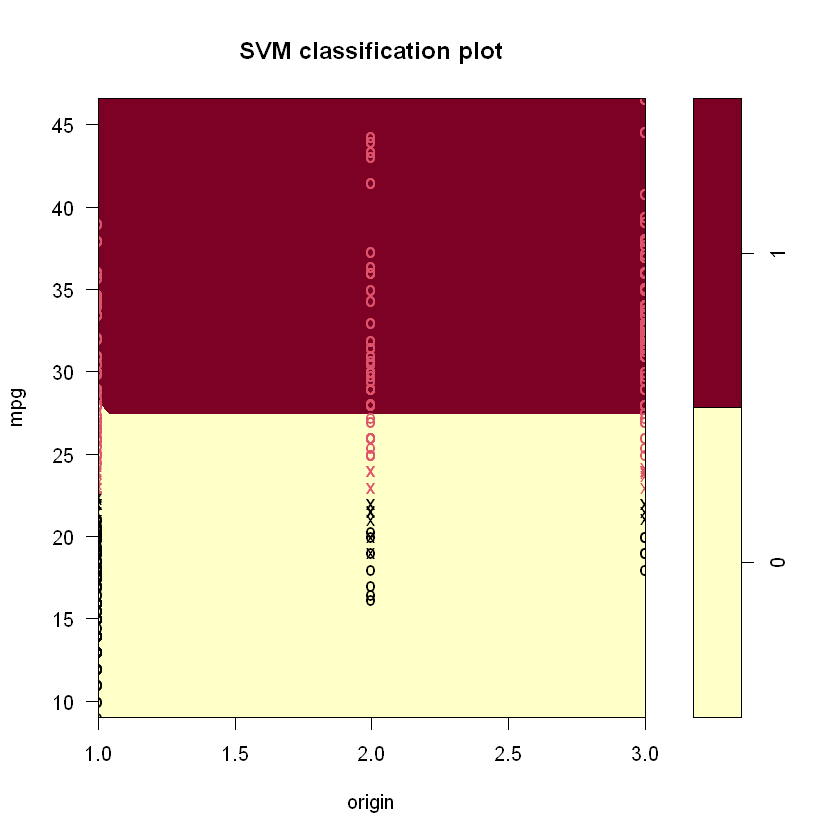

In [36]:
#d) 

svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

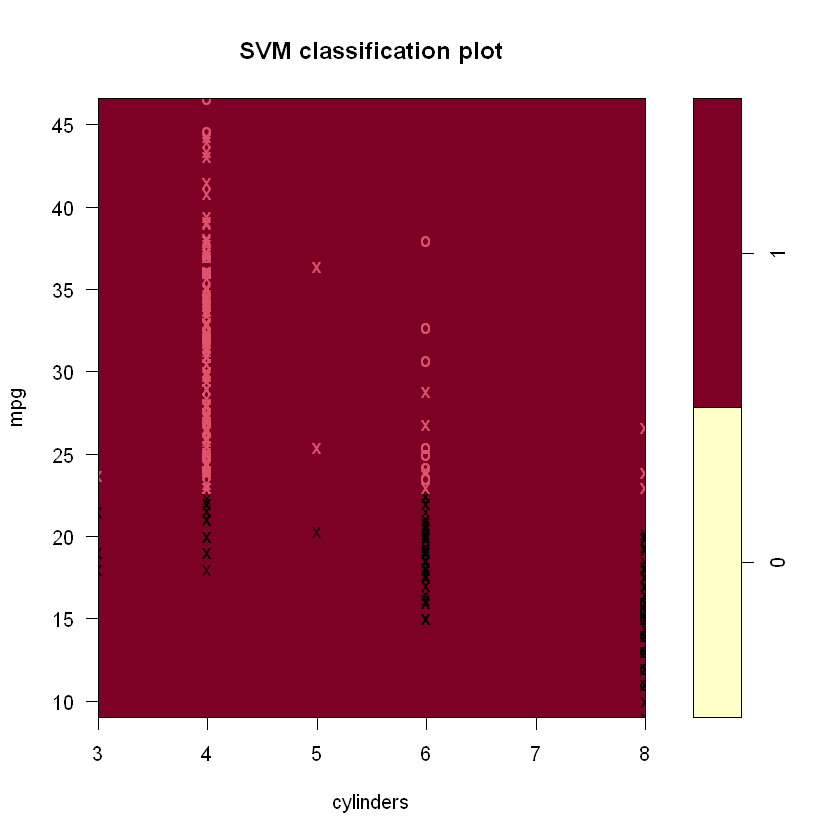

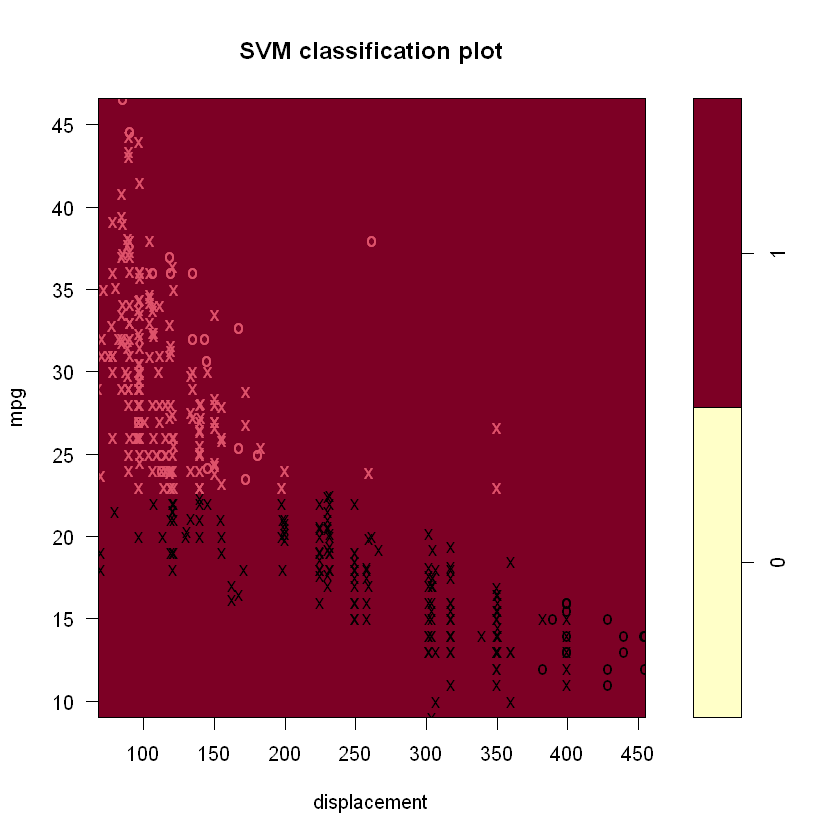

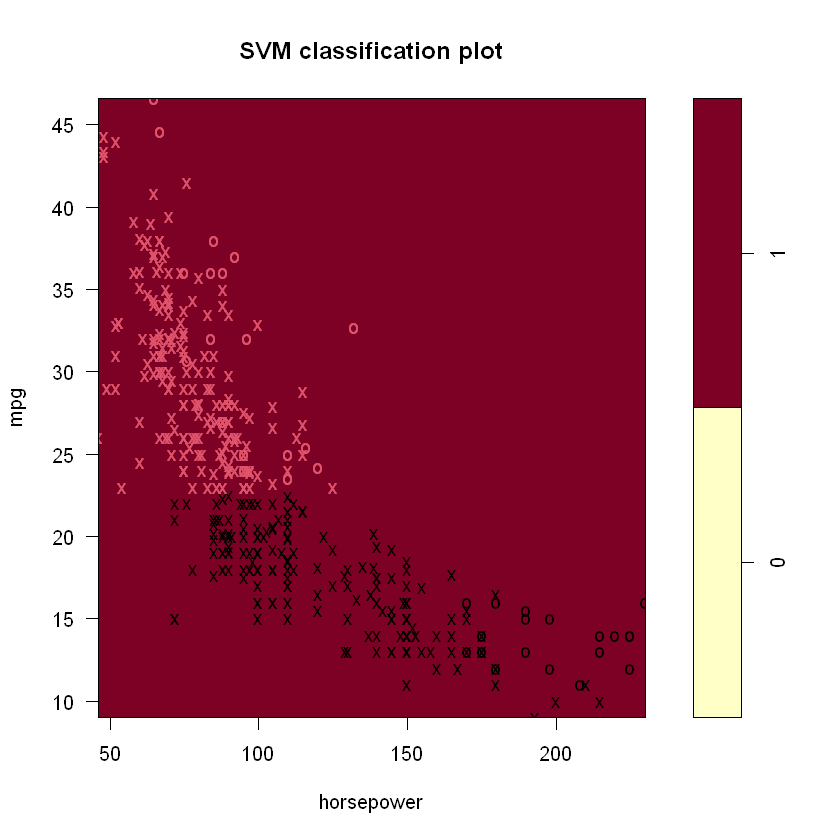

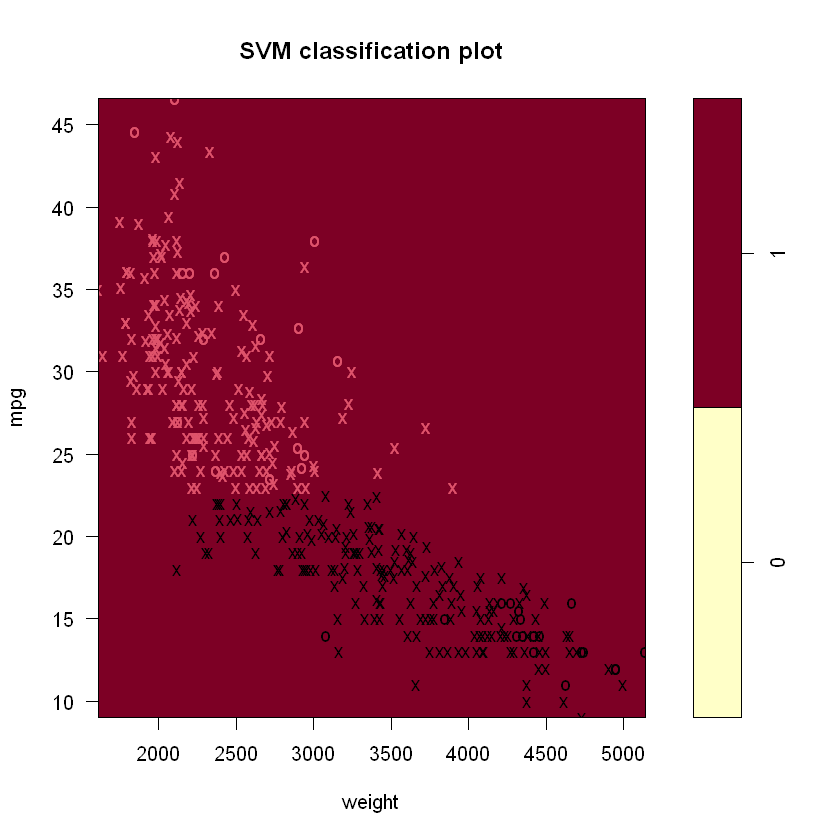

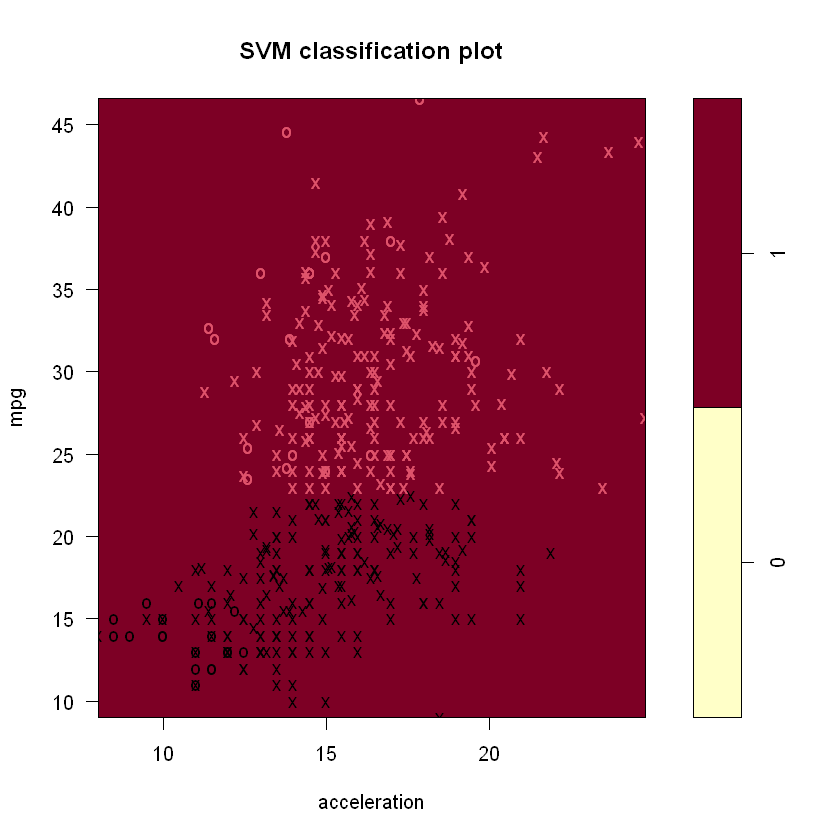

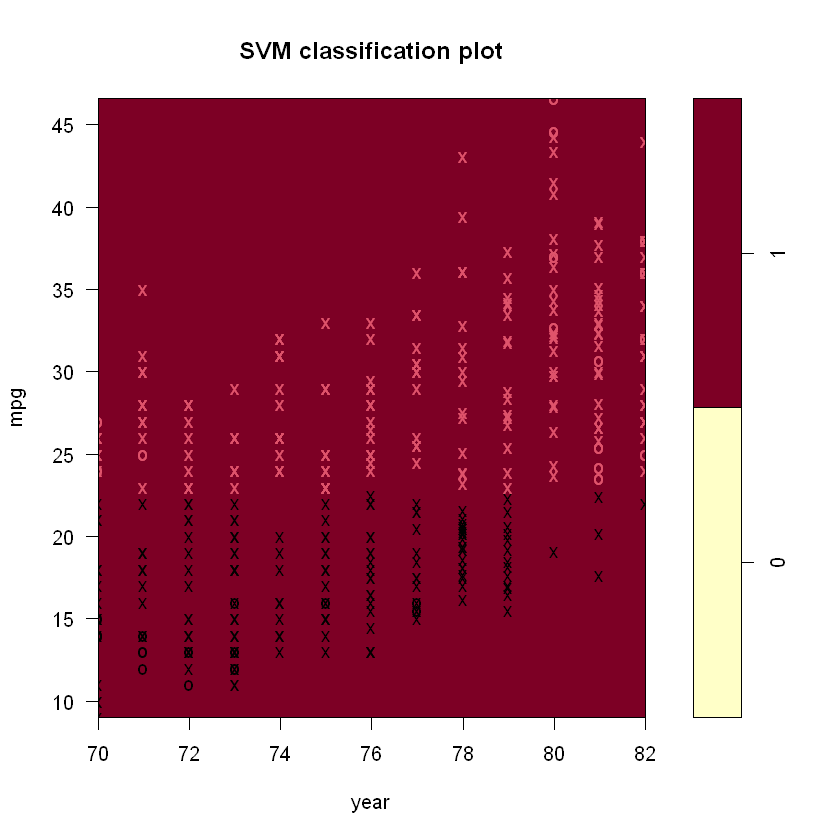

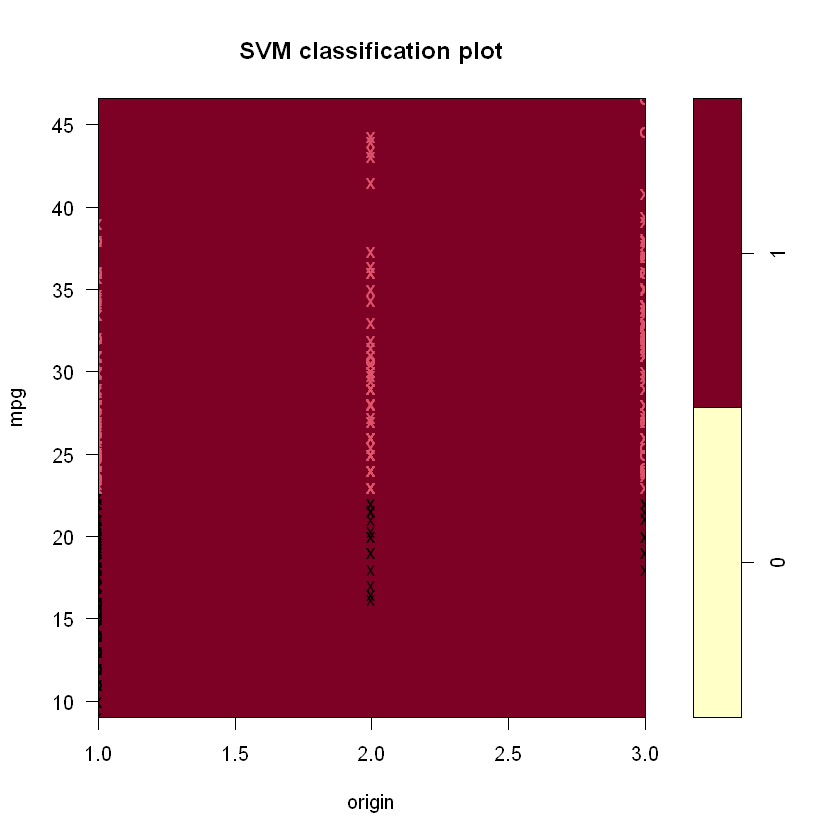

In [37]:
plotpairs(svm.poly)

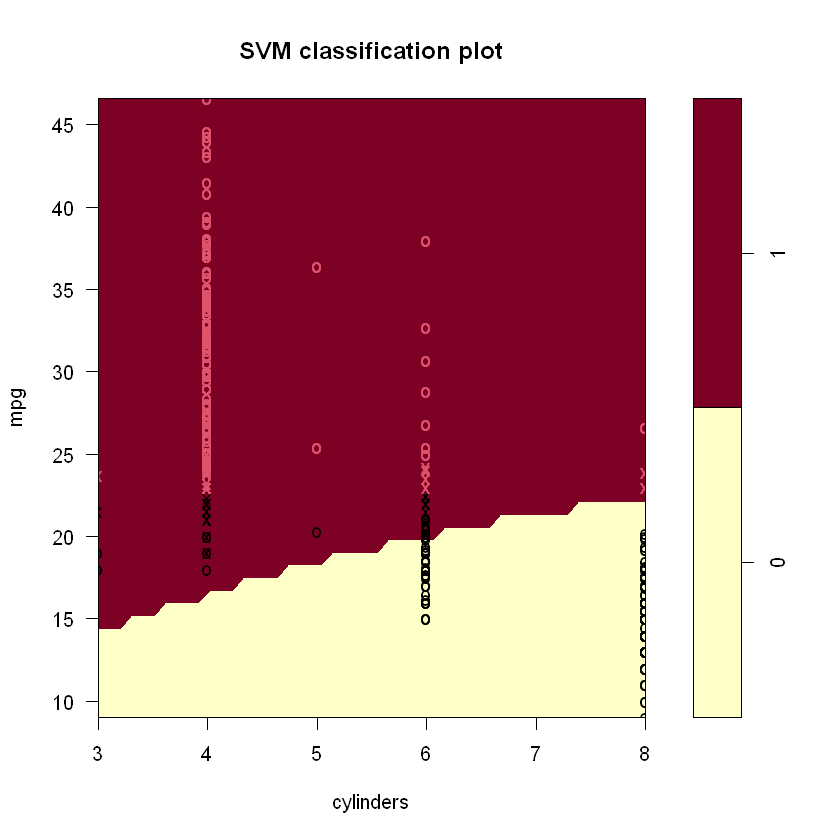

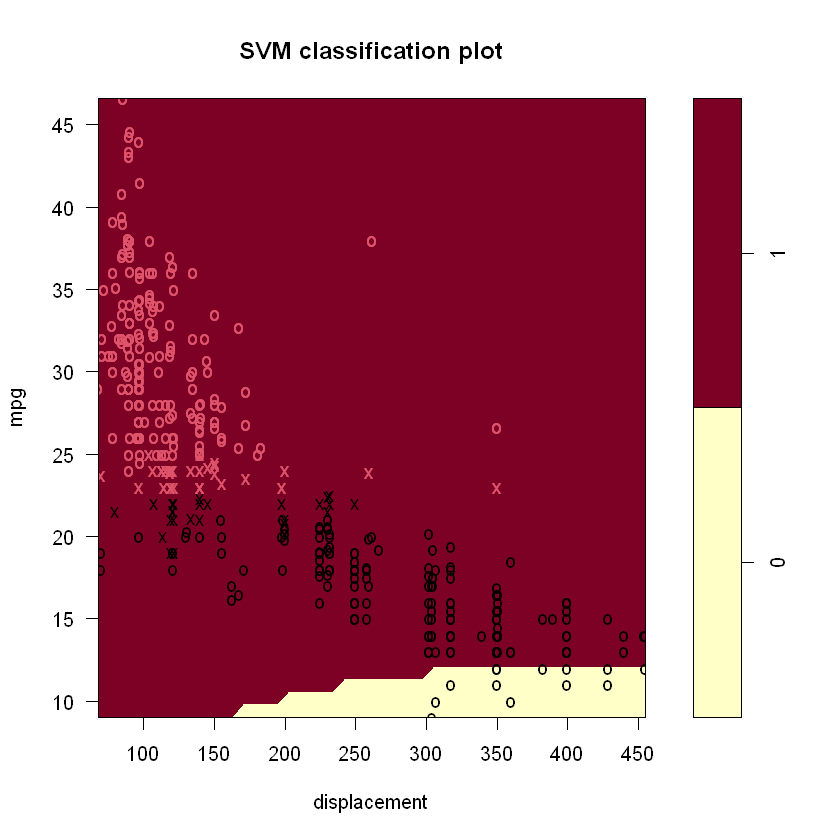

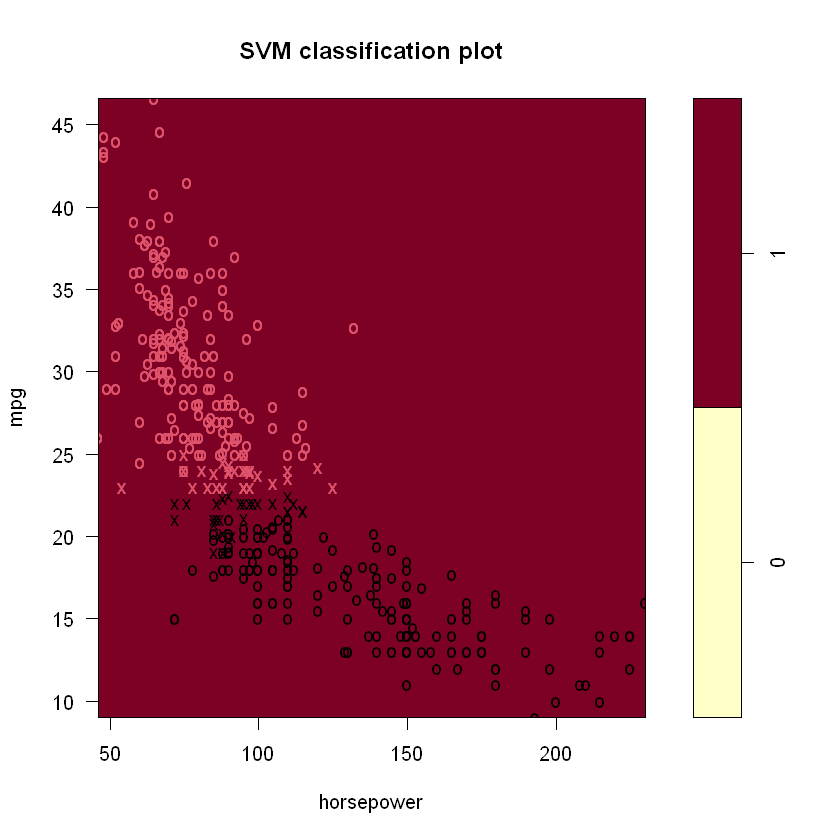

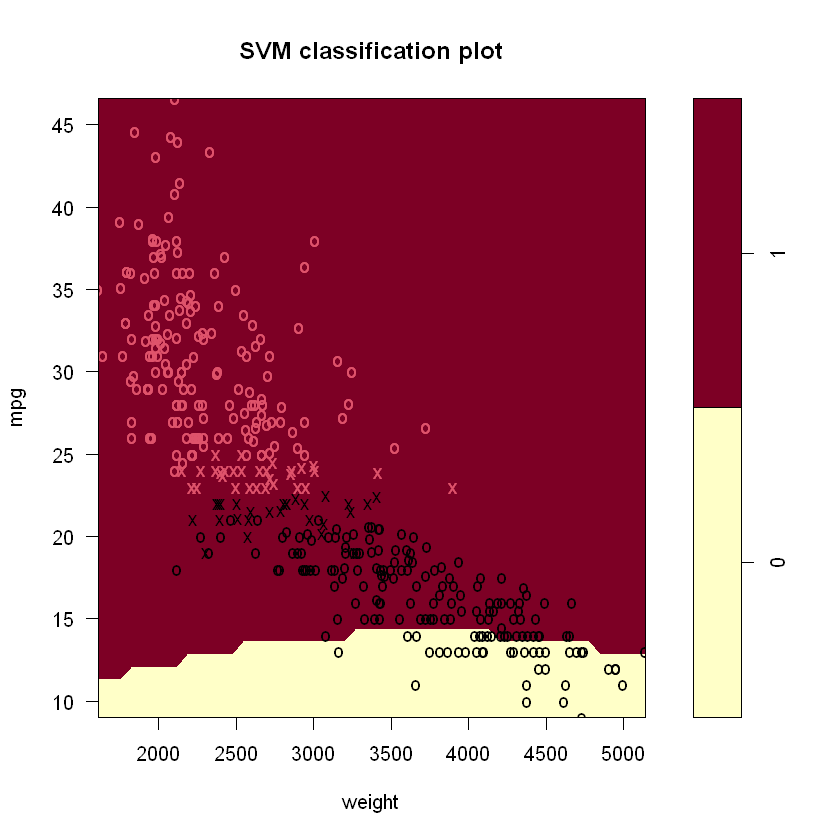

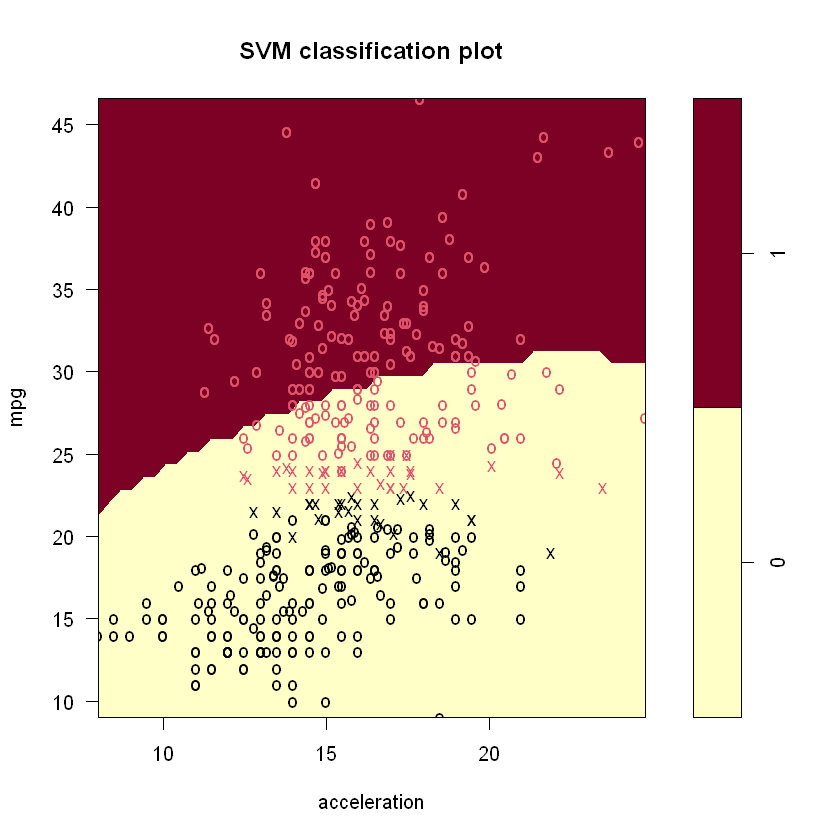

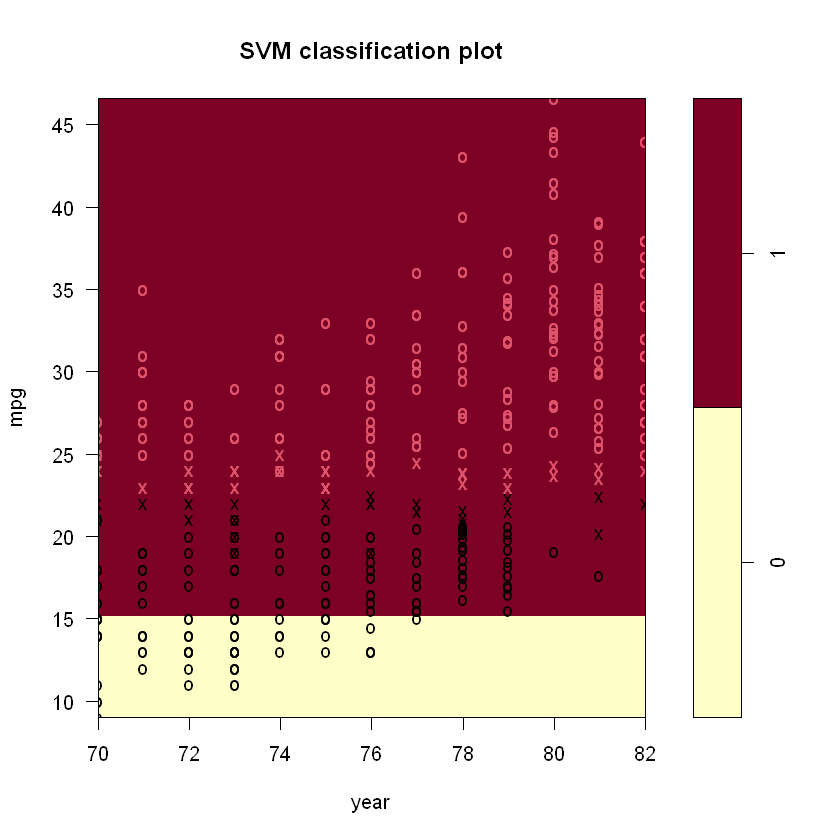

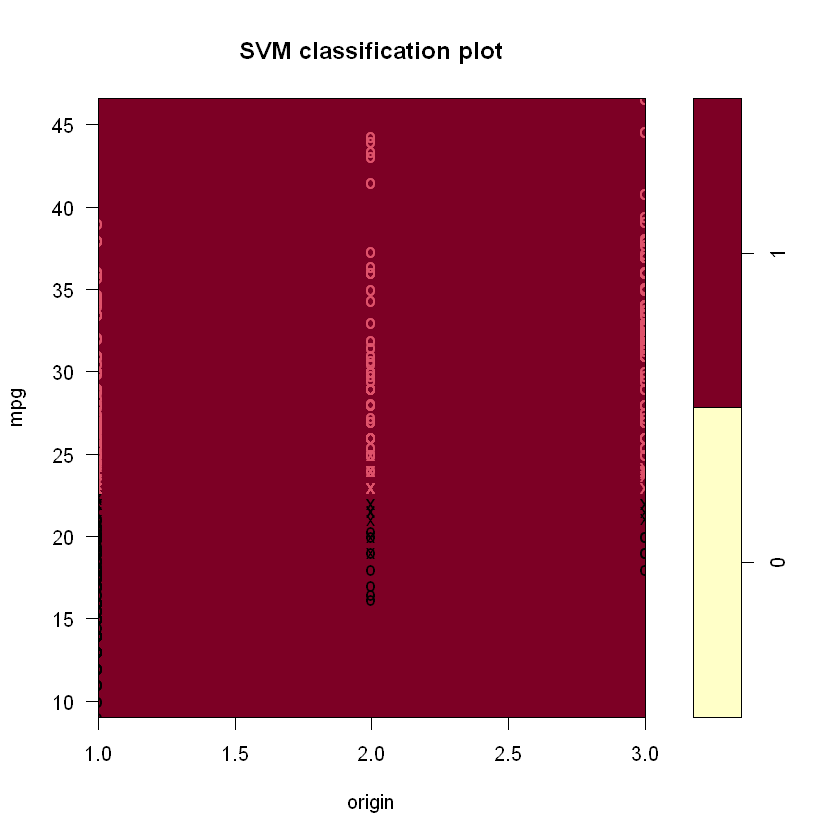

In [38]:
plotpairs(svm.radial)

Q8) This problem involves the “OJ” data set which is part of the ISLR package.

a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [39]:
set.seed(123)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [40]:
#b) 

svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 220 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [41]:
#c) 

train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 426  61
  MM  71 242

In [42]:
(71 + 61) / (426 + 242 + 71 + 61)

[1] 0.165

In [43]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 145  21
  MM  27  77

In [44]:
(27+ 21) / (145 + 77 + 27 + 21)

[1] 0.1777778

The training error rate is 16.5% and test error rate is about 17.77%.

In [45]:
set.seed(123)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.16375 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17375 0.04910660
2   0.01778279 0.17250 0.04816061
3   0.03162278 0.17125 0.04678927
4   0.05623413 0.17250 0.04594683
5   0.10000000 0.17500 0.04823265
6   0.17782794 0.17625 0.04427267
7   0.31622777 0.17125 0.04084609
8   0.56234133 0.17125 0.04168749
9   1.00000000 0.16875 0.03963812
10  1.77827941 0.16875 0.04135299
11  3.16227766 0.16375 0.04185375
12  5.62341325 0.17125 0.03998698
13 10.00000000 0.17000 0.04005205


In [46]:
#d)

set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
       cost
 0.05623413

- best performance: 0.16625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17125 0.03955042
2   0.01778279 0.17000 0.03238227
3   0.03162278 0.16750 0.03446012
4   0.05623413 0.16625 0.03438447
5   0.10000000 0.16625 0.03283481
6   0.17782794 0.16875 0.03596391
7   0.31622777 0.16750 0.03496029
8   0.56234133 0.16625 0.03438447
9   1.00000000 0.16750 0.03395258
10  1.77827941 0.16625 0.03283481
11  3.16227766 0.16750 0.03496029
12  5.62341325 0.16625 0.03230175
13 10.00000000 0.17000 0.02776389


In [48]:
#e) 

svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)

In [49]:
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 424  63
  MM  71 242

In [50]:
(71+ 63) / (424 + 71 + 63 + 242)

[1] 0.1675

In [51]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 148  18
  MM  25  79

In [52]:
(25 + 18) / (148 + 25 + 18 + 79)

[1] 0.1592593

 The training error rate is now 16.75% the test error rate is now 15.9%